<a href="https://colab.research.google.com/github/1901010019/1901010019.github.io/blob/master/introduction_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2021-06-29 17:38:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.199.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  97.0MB/s    in 1.1s    

2021-06-29 17:38:38 (97.0 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [3]:
# now, unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train

pizza  steak


In [6]:
!ls pizza_steak/test

pizza  steak


In [7]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [8]:
import os 
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

# one extra image shown is of file .DS_Store , sp don't get confused.

there are 2 directories and 1 images in pizza_steak.
there are 2 directories and 1 images in pizza_steak/train.
there are 0 directories and 750 images in pizza_steak/train/pizza.
there are 0 directories and 750 images in pizza_steak/train/steak.
there are 2 directories and 1 images in pizza_steak/test.
there are 0 directories and 250 images in pizza_steak/test/pizza.
there are 0 directories and 250 images in pizza_steak/test/steak.


In [9]:
 # another way of finding out how many files are there in our current directory
 num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
 num_steak_images_train

750

In [10]:
# to visualize our images let's first get the class names programatically
import pathlib
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:] # reason for doing this is to get rid of .DS_Store file name
print(class_names)

['pizza' 'steak']


In [11]:
# plotting the random images
import random
def view_random_image(target_dir, target_class):
  # setup the target directory ( we'll view images from here)
  target_folder = target_dir + target_class
  # get a random image path
  random_image = random.sample(os.listdir(target_folder),1) # we said randomly sample one of the item in the given directory
  print(random_image)
  # read in the image and plot it
  img = mpimg.imread(target_folder+'/'+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"image shape: {img.shape}")
  return img

['1606596.jpg']
image shape: (512, 512, 3)


array([[[243, 219, 191],
        [244, 220, 196],
        [246, 221, 199],
        ...,
        [252, 213, 156],
        [254, 215, 156],
        [255, 217, 158]],

       [[244, 220, 196],
        [246, 221, 199],
        [247, 222, 202],
        ...,
        [250, 211, 154],
        [250, 211, 154],
        [250, 211, 154]],

       [[244, 219, 199],
        [245, 220, 200],
        [248, 221, 204],
        ...,
        [249, 210, 153],
        [246, 207, 150],
        [243, 204, 147]],

       ...,

       [[ 68,  18,   7],
        [ 64,  14,   3],
        [ 67,  17,   6],
        ...,
        [ 26,   2,   0],
        [ 26,   2,   0],
        [ 26,   2,   0]],

       [[ 64,  16,   4],
        [ 60,  12,   0],
        [ 59,  13,   0],
        ...,
        [ 31,  10,   5],
        [ 31,  10,   5],
        [ 31,  10,   5]],

       [[ 66,  20,   7],
        [ 60,  14,   1],
        [ 56,  10,   0],
        ...,
        [ 37,  16,  11],
        [ 36,  16,   9],
        [ 35,  15,   8]]

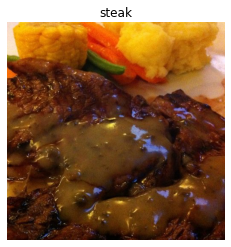

In [12]:
img = view_random_image('pizza_steak/train/', 'steak')
img

In [13]:
# converting our image to a tensor
img = tf.constant(img)
img

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[243, 219, 191],
        [244, 220, 196],
        [246, 221, 199],
        ...,
        [252, 213, 156],
        [254, 215, 156],
        [255, 217, 158]],

       [[244, 220, 196],
        [246, 221, 199],
        [247, 222, 202],
        ...,
        [250, 211, 154],
        [250, 211, 154],
        [250, 211, 154]],

       [[244, 219, 199],
        [245, 220, 200],
        [248, 221, 204],
        ...,
        [249, 210, 153],
        [246, 207, 150],
        [243, 204, 147]],

       ...,

       [[ 68,  18,   7],
        [ 64,  14,   3],
        [ 67,  17,   6],
        ...,
        [ 26,   2,   0],
        [ 26,   2,   0],
        [ 26,   2,   0]],

       [[ 64,  16,   4],
        [ 60,  12,   0],
        [ 59,  13,   0],
        ...,
        [ 31,  10,   5],
        [ 31,  10,   5],
        [ 31,  10,   5]],

       [[ 66,  20,   7],
        [ 60,  14,   1],
        [ 56,  10,   0],
        ...,
        [ 37,  16,  1

In [14]:
# let's do an end to end preprocessing as well as building of the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
# preprocessed data is normalized and the values are between 0 and 1
train_datagen = ImageDataGenerator(rescale=1/255.)
validation_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
valid_data = validation_datagen.flow_from_directory(directory=test_dir,
                                                    batch_size=32,
                                                    target_size=(224,224),
                                                    class_mode='binary',
                                                    seed=42)

# building our model
model_1  = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
        tf.keras.layers.Conv2D(10,3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.Conv2D(10, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(2, padding='valid'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# compiling our CNN model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_1.fit(train_data, epochs=5, steps_per_epoch= len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 196ms/step - loss: 0.5573 - accuracy: 0.7127 - val_loss: 0.4232 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4173 - accuracy: 0.8127 - val_loss: 0.3338 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3987 - accuracy: 0.8273 - val_loss: 0.3351 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3553 - accuracy: 0.8493 - val_loss: 0.3158 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3446 - accuracy: 0.8580 - val_loss: 0.3471 - val_accuracy: 0.8580


In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [16]:
model_1.evaluate(valid_data)

16/16 [==============================] - 2s 126ms/step - loss: 0.3471 - accuracy: 0.8580


[0.34709465503692627, 0.8579999804496765]

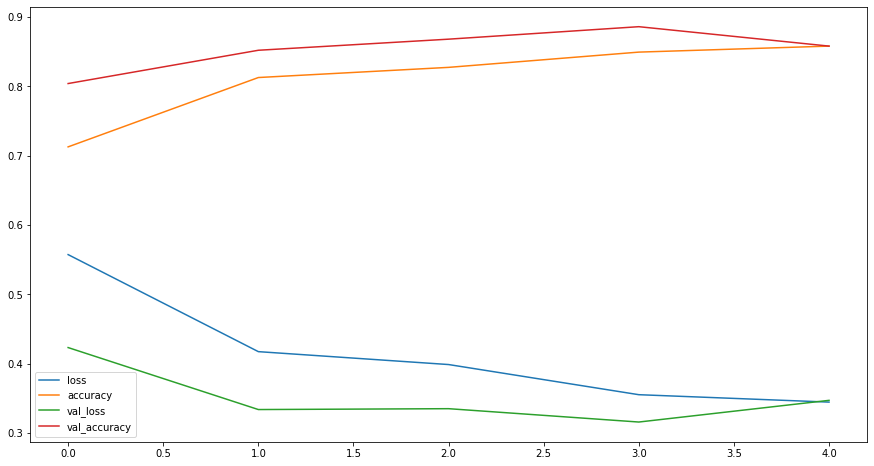

In [17]:
pd.DataFrame(history.history).plot(figsize=(15,8)) # loss vs accuracy curve

In [18]:
# we will make our own function to plot the loss vs accuracy curves
def plot_curve(history):
  """
  this function will return the loss and accuracy curves with epoch based upon the history of the model
  """
  loss = history.history['loss']
  accuracy = history.history['accuracy']
  val_loss = history.history['val_loss']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss'])) # this line of code can be interpreted with some commom sense
  # now we will plot the graphs
  # first we will plot for loss
  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='validation loss')
  plt.xlabel('epochs')
  plt.title('loss')
  plt.legend()
  plt.figure() # if we want seperate plots, this line of code should be included.
  # secondly we will plot for accuracy
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='validation accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()


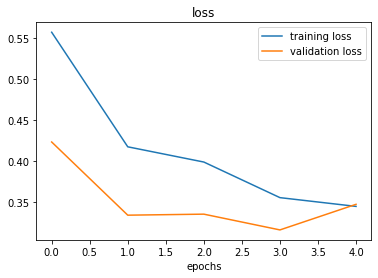

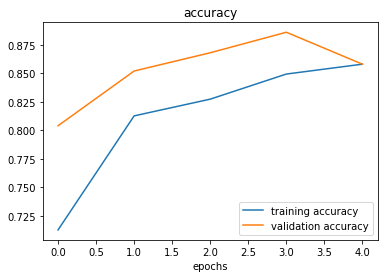

In [19]:
plot_curve(history) # for better visulization, we created a different and new function, hurray!
# loss is decreasing and accuracy is increasing, and we can see this from graph.

##building a brand new model using data augmentation and several different techniques which helps in improvement of our model

In [20]:
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

**NOTE** - **reducing overfitting is also known as regularization**

In [21]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range = 0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
# test_datagen_augmented = ImageDataGenerator(rescale=1/255.,
#                                             rotation_range=0.2,
#                                             shear_range=0.2,
#                                             zoom_range=0.2,
#                                             width_shift_range=0.2,
#                                             height_shift_range=0.3,
#                                             horizontal_flip=True)
"""
we try to keep the test data in our original form as much as possible because of we want our model to make predictions over 
completely unseen set of data

"""
# now we will make data generator without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.) 


In [22]:
print('augmented training data: ')
train_data_augmented =  train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode='binary',
                                                                    shuffle=True)

print('non augmented training data: ')
train_data =  train_datagen.flow_from_directory(train_dir, 
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='binary',
                                                shuffle=True)
print('non augmented test data: ')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary',
                                             shuffle=True)
# note- there are many ways to augement the data or so to say, data augmentation.

augmented training data: 
Found 1500 images belonging to 2 classes.
non augmented training data: 
Found 1500 images belonging to 2 classes.
non augmented test data: 
Found 500 images belonging to 2 classes.


In [23]:
images, labels = train_data.next()
images_augemented, _ = train_data_augmented.next() # note- labels are not augmented

showing image number 11


(-0.5, 223.5, 223.5, -0.5)

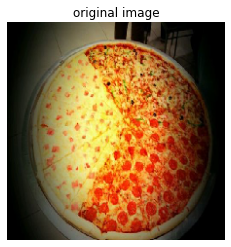

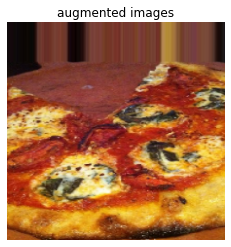

In [24]:
import random
random_number = random.randint(0,32)
print(f"showing image number {random_number}")
plt.imshow(images[random_number])
plt.title(f'original image')
plt.axis(False)
plt.figure()
plt.imshow(images_augemented[random_number])
plt.title(f"augmented images")
plt.axis(False)

In [25]:
# now let's build a model on our augemented data
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten

In [26]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential(
    [
     Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
     MaxPool2D(),
     Conv2D(10, 3, activation='relu'),
     MaxPool2D(),
     Conv2D(10, 3, activation='relu'),
     MaxPool2D(),
     Flatten(),
     Dense(1, activation='sigmoid')
    ]
)

# now compiling our model
model_2.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# we can also use call back here if we want to further evaluate our model.
# fitting our model on augemented training data
history_2 = model_2.fit(train_data_augmented, steps_per_epoch=len(train_data_augmented), epochs=5, validation_data=test_data,
            validation_steps=len(test_data))
# performance increased drastically in my case, after using shuffle=True, else model was not performing well. jai ho randomness!!

Epoch 1/5
47/47 [==============================] - 22s 448ms/step - loss: 0.6340 - accuracy: 0.6287 - val_loss: 0.5046 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 21s 447ms/step - loss: 0.5455 - accuracy: 0.7287 - val_loss: 0.4434 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 21s 444ms/step - loss: 0.5040 - accuracy: 0.7520 - val_loss: 0.3604 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 21s 444ms/step - loss: 0.4721 - accuracy: 0.7860 - val_loss: 0.3318 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 21s 449ms/step - loss: 0.4323 - accuracy: 0.8013 - val_loss: 0.3473 - val_accuracy: 0.8600


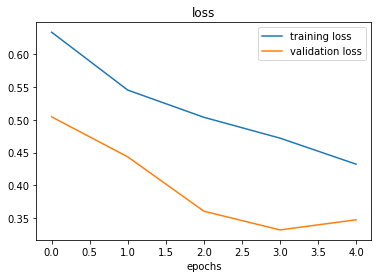

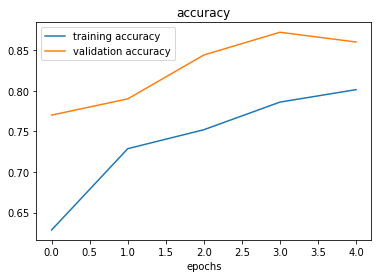

In [27]:
plot_curve(history_2)

In [28]:
# making a prediction with our trained image in our custom data
print(class_names)

['pizza' 'steak']


In [29]:
# getting the raw data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-06-29 17:42:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-06-29 17:42:14 (31.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



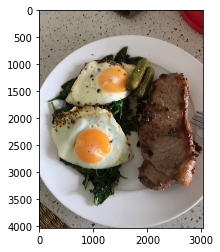

In [30]:
import matplotlib.image as mpimg
steak = mpimg.imread('03-steak.jpeg')
steak
plt.imshow(steak)

In [31]:
steak.shape # it's fairly large in size

(4032, 3024, 3)

In [32]:
# we need to preprocess the data, for this we will use a function which we will built.
def load_and_prep_image(filename, img_size=224): # we kept the default size as 224, but this can be changed at later stage by the user
  """
  this will take the filename , decode it and then preprocess our image data.
  """
  # taking file as an input
  img = tf.io.read_file(filename)
  # now we will decode our image data
  img = tf.image.decode_image(img)
  # now we will resize our image
  img = tf.image.resize(img, size=[img_size, img_size])
  # now we will rescale our image
  img = img/255.
  return img

In [33]:
steak = load_and_prep_image('03-steak.jpeg')

In [34]:
proba = model_2.predict(tf.expand_dims(steak, axis=0)) # we need to expand our model as it is expecting batch size also as an extra dimension
proba
# here we have got the prediction probabilities

array([[0.9406241]], dtype=float32)

In [35]:
# model_2.predict(steak)
# Input 0 of layer sequential_4 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (32, 224, 3)

In [36]:
# what does expansion did?
tf.expand_dims(steak, axis=0), steak.ndim # this way we can see, dimension of this particular tensor has been expanded.

(<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
 array([[[[0.6377451 , 0.6220588 , 0.57892156],
          [0.6504902 , 0.63186276, 0.5897059 ],
          [0.63186276, 0.60833335, 0.5612745 ],
          ...,
          [0.52156866, 0.05098039, 0.09019608],
          [0.49509802, 0.04215686, 0.07058824],
          [0.52843136, 0.07745098, 0.10490196]],
 
         [[0.6617647 , 0.6460784 , 0.6107843 ],
          [0.6387255 , 0.6230392 , 0.57598037],
          [0.65588236, 0.63235295, 0.5852941 ],
          ...,
          [0.5352941 , 0.06862745, 0.09215686],
          [0.529902  , 0.05931373, 0.09460784],
          [0.5142157 , 0.05539216, 0.08676471]],
 
         [[0.6519608 , 0.6362745 , 0.5892157 ],
          [0.6392157 , 0.6137255 , 0.56764704],
          [0.65637255, 0.6269608 , 0.5828431 ],
          ...,
          [0.53137255, 0.06470589, 0.08039216],
          [0.527451  , 0.06862745, 0.1       ],
          [0.52254903, 0.05196078, 0.0872549 ]],
 
         ...,
 
       

In [37]:
# converting the probabilities into human undertandable format
pred = class_names[int(tf.round(proba))]
pred # woooohoooo, we got the name of the class correct!!!

'steak'

In [38]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  this function takes the model name, make the prediction, and then will return the predicted class name
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename) # we have already made this function for preprocessig of the custom data
  # make the prediction on the custom image
  proba = model.predict(tf.expand_dims(img, axis=0)) # this will return us the probabilities
  # now we will try to get out the human readable class name
  pred = class_names[int(tf.round(proba))]
  # now we will plot the image
  plt.imshow(img)
  plt.title(f"prediction: {pred}")
  plt.axis(False)
  return pred

'steak'

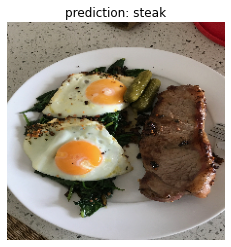

In [39]:
pred_and_plot(model_2, '03-steak.jpeg') # beautiful..

In [40]:
# let's try our model on another raw data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2021-06-29 17:42:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2021-06-29 17:42:16 (39.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



'pizza'

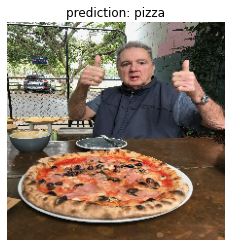

In [41]:
pred_and_plot(model_1, '03-pizza-dad.jpeg') # model 1 predicted it right.

'pizza'

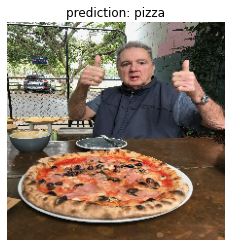

In [42]:
pred_and_plot(model_2, '03-pizza-dad.jpeg') # model 2 is predicting this wrong.

# **Multiclass Classification**

In [43]:
import zipfile
!wget !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-06-29 17:42:17--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2021-06-29 17:42:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   253MB/s    in 2.0s    

2021-06-29 17:42:19 (253 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

FINISHED --2021-06-29 17:42:19--
Total wall clock time: 2.1s
Downloaded: 1 files, 495M in 2.0s (253 MB/s)


In [44]:
# unzipping our dataset
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip','r')
zip_ref.extractall()
zip_ref.close()

In [45]:
import os
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 2 directories and 0 images in 10_food_classes_all_data
there are 10 directories and 0 images in 10_food_classes_all_data/train
there are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
there are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
there are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
there are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
there are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
there are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
there are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
there are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
there are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
there are 0 directories and 750 images in 10_food_classes_all_data/train/steak
there are 10 directories and 0 imag

In [46]:
train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

In [47]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['221468.jpg']
image shape: (384, 512, 3)


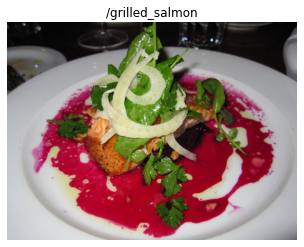

In [48]:
import random
img = view_random_image(target_dir = train_dir, target_class = '/'+random.choice(class_names))

In [49]:
# preprocessing phase
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [50]:
# we have seen CNN explainer website, here we will try to replicate their model
from tensorflow.keras.optimizers import Adam

tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
                               Conv2D(10, 3, input_shape=(224,224,3), activation='relu'),
                               Conv2D(10,3,activation='relu'),
                               MaxPool2D(),
                               Conv2D(10,3,activation='relu'),
                               Conv2D(10,3,activation='relu'),
                               MaxPool2D(),
                               Flatten(),
                               Dense(10, activation='softmax')
])

# compiling our model
model_3.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])


In [51]:
len(train_data) # 7500/32==235, our data is getting generated in the batch size of 32

235

In [52]:
# training our model after fitting
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 187ms/step - loss: 2.1005 - accuracy: 0.2396 - val_loss: 1.8930 - val_accuracy: 0.3636
Epoch 2/5
235/235 [==============================] - 43s 184ms/step - loss: 1.8068 - accuracy: 0.3741 - val_loss: 1.8975 - val_accuracy: 0.3436
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.4096 - accuracy: 0.5276 - val_loss: 1.8805 - val_accuracy: 0.3636
Epoch 4/5
235/235 [==============================] - 44s 187ms/step - loss: 0.7509 - accuracy: 0.7585 - val_loss: 2.5126 - val_accuracy: 0.2988
Epoch 5/5
235/235 [==============================] - 43s 184ms/step - loss: 0.2818 - accuracy: 0.9181 - val_loss: 3.6721 - val_accuracy: 0.2844


In [53]:
model_3.evaluate(test_data)

79/79 [==============================] - 10s 132ms/step - loss: 3.6721 - accuracy: 0.2844


[3.672069549560547, 0.28439998626708984]

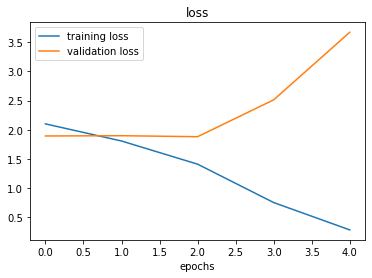

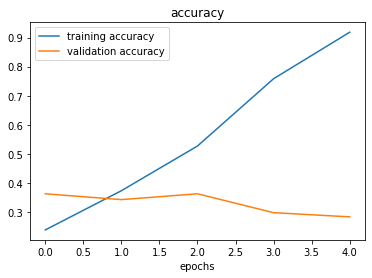

In [54]:
plot_curve(history_3)

**above loss curves tells us that our model is overfitting, i.e, it's learning on training data superbly and thus not able to generalize and rather memorize the patterns**

In [55]:
# we will tune the hyperparameters to reduce the validation loss and to reduce the overfitting
# let's try to simplify our model first, most of the times overfitting occurs due to overcomplicated models.
model_4 = tf.keras.Sequential([
                               Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
                               MaxPool2D(),
                               Conv2D(10,3,activation='relu'),
                               MaxPool2D(),
                               Flatten(),
                               Dense(10, activation='softmax')
]) 
model_4.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 176ms/step - loss: 2.0896 - accuracy: 0.2629 - val_loss: 1.9430 - val_accuracy: 0.3120
Epoch 2/5
235/235 [==============================] - 41s 175ms/step - loss: 1.7527 - accuracy: 0.4071 - val_loss: 1.9016 - val_accuracy: 0.3348
Epoch 3/5
235/235 [==============================] - 41s 175ms/step - loss: 1.3670 - accuracy: 0.5500 - val_loss: 1.9422 - val_accuracy: 0.3416
Epoch 4/5
235/235 [==============================] - 41s 174ms/step - loss: 0.8704 - accuracy: 0.7300 - val_loss: 2.2876 - val_accuracy: 0.3136
Epoch 5/5
235/235 [==============================] - 41s 174ms/step - loss: 0.4333 - accuracy: 0.8817 - val_loss: 2.8038 - val_accuracy: 0.3040


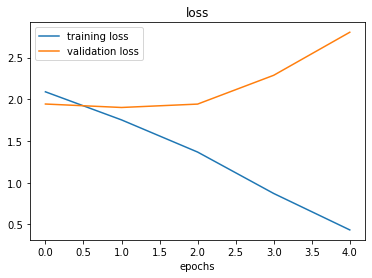

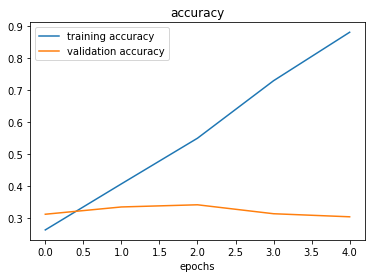

In [56]:
plot_curve(history_4) # so, simplifying our model didnot do any thing, in the sense it didnot reduce overfitting.

**trying to reduce overfitting with the help of data augmentation**

In [57]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical'
                                               )

Found 7500 images belonging to 10 classes.


In [58]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28090)            

In [59]:
# let's create a new model but this time we will fit it on the augmented data
model_5 = tf.keras.models.clone_model(model_3) # here we cloned the model
# compiling the model
model_5.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])
history_5 = model_5.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 107s 454ms/step - loss: 2.3031 - accuracy: 0.1112 - val_loss: 2.2737 - val_accuracy: 0.1440
Epoch 2/5
235/235 [==============================] - 107s 454ms/step - loss: 2.2477 - accuracy: 0.1648 - val_loss: 2.1500 - val_accuracy: 0.2236
Epoch 3/5
235/235 [==============================] - 106s 452ms/step - loss: 2.1669 - accuracy: 0.2076 - val_loss: 2.1035 - val_accuracy: 0.2348
Epoch 4/5
235/235 [==============================] - 106s 452ms/step - loss: 2.0977 - accuracy: 0.2484 - val_loss: 1.9089 - val_accuracy: 0.3348
Epoch 5/5
235/235 [==============================] - 106s 452ms/step - loss: 2.0172 - accuracy: 0.2893 - val_loss: 1.8521 - val_accuracy: 0.3480


In [60]:
model_5.summary() # we can see parameters have not decreased.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28090)            